# Control based on Value function approximation (coarse-coding)

This notebook implements SARSA based control using value function appproximation 


In [1]:
from Environment import *
from ExactRL import *
from Plot_utilities import *
from ApproximateRL import *

In [3]:
sim = simulator()
RLMCobj = MC_ExactRL(config(), sim.init, sim.step)
RLMCobj.Monte_Carlo_Control(6000000)

Loading object for SARSA based control. The state space is approximated based on coarse featurization 


In [22]:
RLSobj = ApproxRL(config(), sim.init, sim.step, 0.5, coarse_featurizer)
RLSobj.Apply_SARSA(100000)

# SARSA estimae based on value function approximation 
This takes fewer episodes to converge but with greater bias compared to exact SARSA 


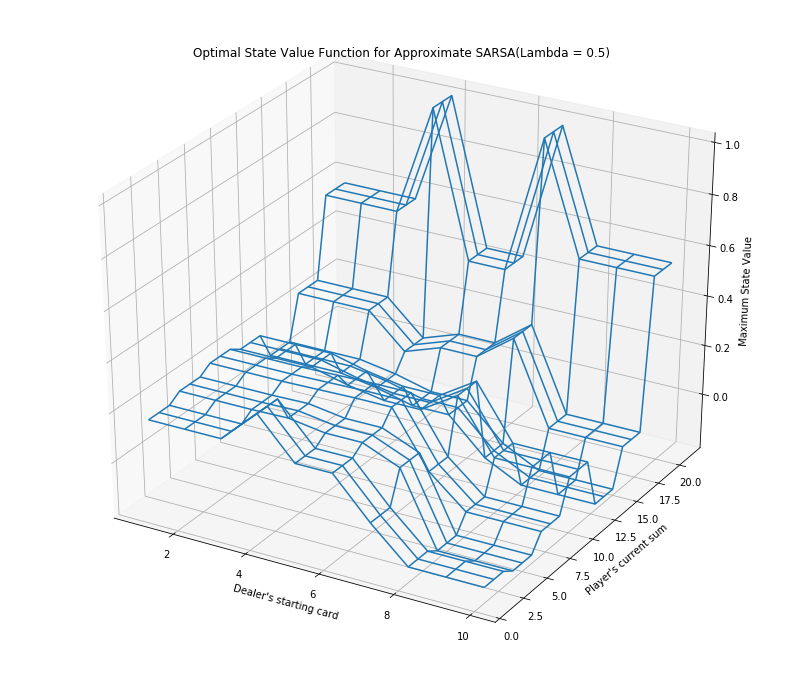

In [23]:
plot(RLSobj, "Optimal State Value Function for Approximate SARSA(Lambda = 0.5)")

# Error Analysis for SARSA with value function approximation 
For only 1000 episodes, SARSA with state-space approximation has lower MSE compared to SARSA w/o approximation!  


In [26]:
def MSE_Compute(Q2):
    la = np.linspace(0,1,11)
    Y = []
    for l1 in list(la):
        RLSobj =ApproxRL(config(), sim.init, sim.step, l1, coarse_featurizer)
        RLSobj.Apply_SARSA(1000)
        Y.append(MSE(RLSobj.getQtable(), Q2))    
    plt.subplot(2, 1, 1)
    plt.plot(la, np.asarray(Y), 'r')
    plt.title('MSE(Q,Q*) as function of Lambda')
    plt.show()     

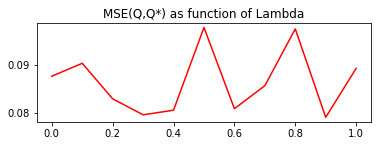

In [27]:
MSE_Compute(RLMCobj.Q)